**BitPredict** : A Component of the TensorFlow Developer Certificate Course

Course Link : [TensorFlow Developer Certificate](https://www.udemy.com/share/104ssS3@qr2xIEbG8LOqfGgHfmw-a2Z6r_d_6_olkS5hKSmVWT23wYDJNTbD82qAAoaJss-SKQ==/)

## Get data

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-08-31 12:06:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-08-31 12:06:47 (7.19 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series with pandas

In [2]:
import pandas as pd
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # prase the date column and tell pandas column 1 is a datetime

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
len(df)

2787

In [5]:
# Creating a dataset with only the closing price
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


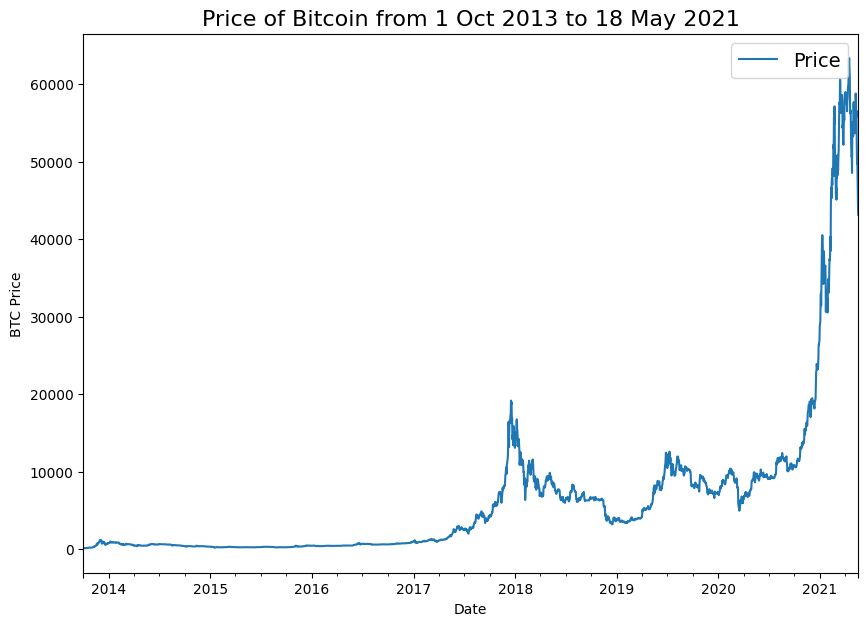

In [6]:
# plotting the data
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

## Importing time series data with Python's CSV module

In [7]:
# Importing and formatting data using Python
import csv
from datetime import datetime

timesteps=[]
btc_price=[]

with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)# skip the first line, which are the titles
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))# get the dates as date not string
    btc_price.append(float(line[2]))# get the closing price

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

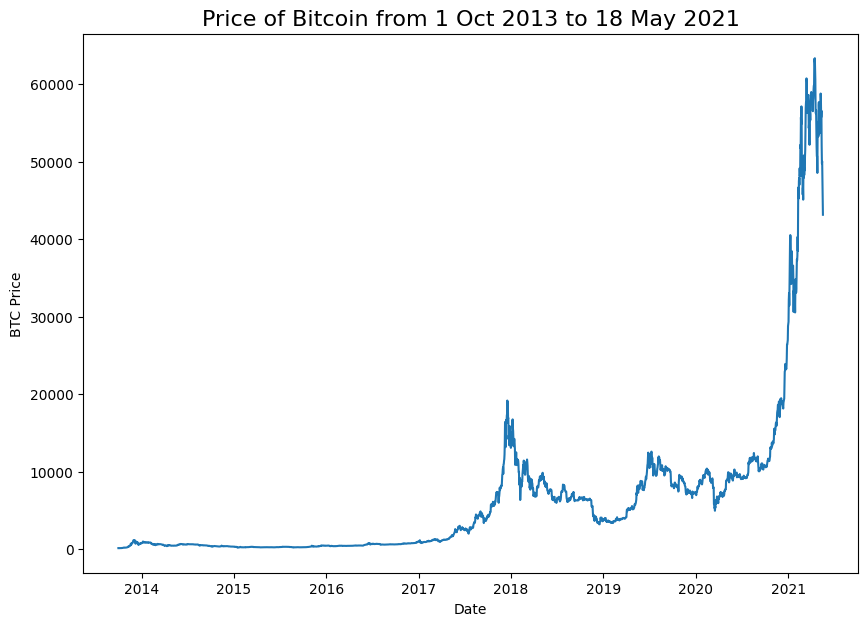

In [8]:
# Plot from CSV
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date");

## Format data part 1: Create train and test sets of the time series data

In [9]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [10]:
split_size = int(0.8 * len(prices))#80% of train and 20% of test

X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

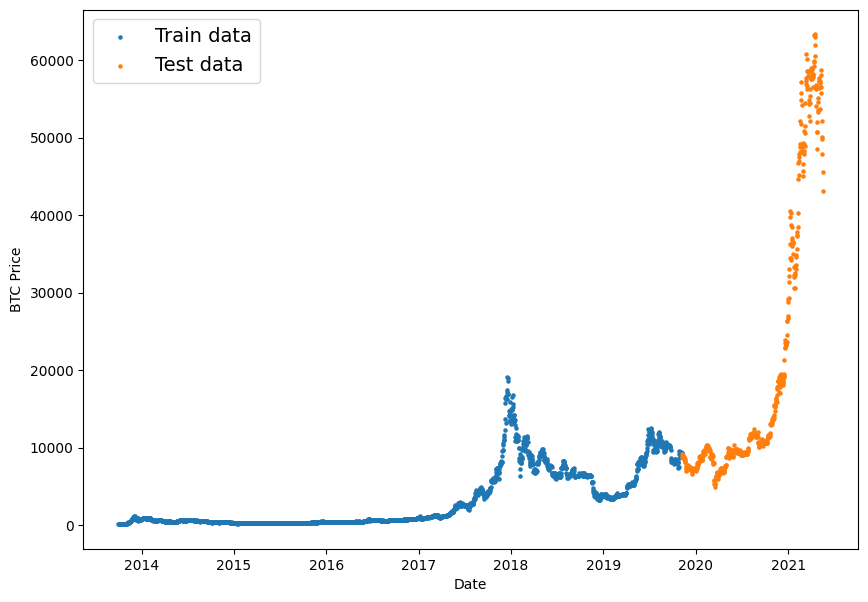

In [11]:
# Plot splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

## Create a plotting function

In [12]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ----------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

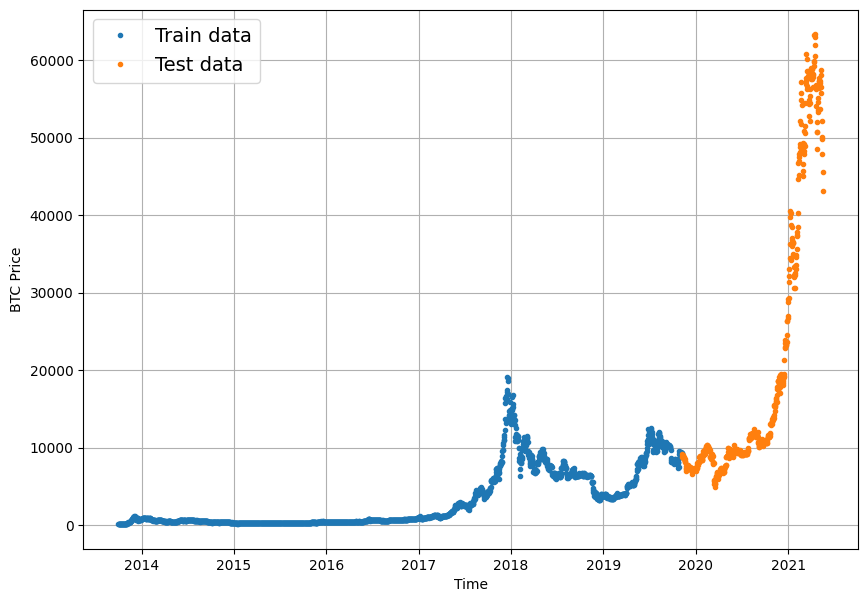

In [13]:
# Test out plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling Experiments
* 0	Naïve model (baseline)
* 1	Dense model, horizon = 1, window = 7
* 2	Same as 1, 	horizon = 1, window = 30
* 3	Same as 1, 	horizon = 7, window =	30
* 4	Conv1D
* 5	LSTM
* 6	Same as 1 (but with multivariate data)
* 7	N-BEATs Algorithm
* 8	Ensemble (multiple models optimized on different loss functions)
* 9	Future prediction model (model to predict future values)
* 10	Same as 1 (but with turkey 🦃 data introduced)

## Model 0: Naive forecast (baseline)
for horizon 1:
the prediction for tomorrow will be closer to the value of today

In [14]:
# Create a naive forecast by excluding the last value
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

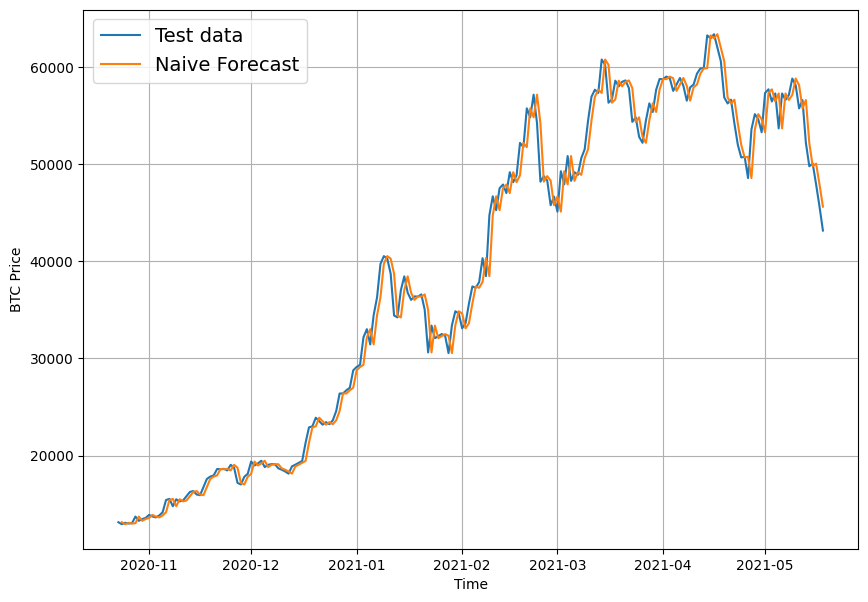

In [15]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, start=350, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, format="-", label="Naive Forecast")

## Evaluating a time series model
A few common regression metrics (which can also be used for time series forecasting):
* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

In [16]:
import tensorflow as tf

In [17]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # here seasonality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

In [18]:
# Test MASE (this value should = 1 or be very close to 1 with the naive forecast)
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

* naive model will have 1(or closer to 1) MASE
* model better that naive will have MASE<1
* model worse than naive will have MASE>1


In [19]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [20]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)

naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Format Data Part 2: Windowing the dataset
windowing means turning time series data into a:
> **supervised learning problem** - <data, label>
```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]



In [21]:
# What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [22]:
# setting up global variables
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [23]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [24]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


using NumPy's array indexing to get windowed data from all of the time series data

In [25]:
import numpy as np

# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # np.arange creates arrays
  # creates a window of size 8 and convert it to a 2D array
  # 1. Create a window of specific window_size (add the horzion on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # print(windowed_array)

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [26]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [27]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


## Turning windows into training and test sets

In [28]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of winodws and labels into train and test splits.
  Default to 80% train & 20% test
  """
  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [29]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [30]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [31]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [32]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Creating a modelling checkpoint callback

To compare each of the model's best performances against the other model's best performances.

In [33]:
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),# the filepath will be like model_experiments/model_name
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)


In [34]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense")

# 2. Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
14/18 [======================>.......] - ETA: 0s - loss: 2384.2417 - mae: 2384.2417 - mse: 15573024.0000

18/18 [==============================] - 12s 192ms/step - loss: 2043.6119 - mae: 2043.6119 - mse: 12767885.0000 - val_loss: 997.1240 - val_mae: 997.1240 - val_mse: 3225712.0000
Epoch 2/100
18/18 [==============================] - 0s 18ms/step - loss: 375.6230 - mae: 375.6230 - mse: 537149.4375 - val_loss: 1861.4672 - val_mae: 1861.4672 - val_mse: 8060693.0000
Epoch 3/100
18/18 [==============================] - 0s 10ms/step - loss: 230.6033 - mae: 230.6033 - mse: 247317.7812 - val_loss: 1108.5691 - val_mae: 1108.5691 - val_mse: 3570187.5000
Epoch 4/100
18/18 [==============================] - 0s 10ms/step - loss: 182.2074 - mae: 182.2074 - mse: 167424.5000 - val_loss: 1009.1358 - val_mae: 1009.1358 - val_mse: 3170482.7500
Epoch 5/100
11/18 [=================>............] - ETA: 0s - loss: 181.7799 - mae: 181.7799 - mse: 178971.2969

18/18 [==============================] - 2s 88ms/step - loss: 173.6927 - mae: 173.6927 - mse: 162778.6562 - val_loss: 966.8335 - val_mae: 966.8335 - val_mse: 2982728.2500
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 167.9694 - mae: 167.9694 - mse: 151066.2188

18/18 [==============================] - 1s 64ms/step - loss: 167.9694 - mae: 167.9694 - mse: 151066.2188 - val_loss: 947.0505 - val_mae: 947.0505 - val_mse: 2969290.2500
Epoch 7/100
16/18 [=========================>....] - ETA: 0s - loss: 167.8433 - mae: 167.8433 - mse: 152134.7812

18/18 [==============================] - 1s 77ms/step - loss: 162.7369 - mae: 162.7369 - mse: 143525.7969 - val_loss: 934.8784 - val_mae: 934.8784 - val_mse: 2761931.2500
Epoch 8/100
10/18 [===============>..............] - ETA: 0s - loss: 155.2950 - mae: 155.2950 - mse: 129990.1719

18/18 [==============================] - 1s 70ms/step - loss: 159.6218 - mae: 159.6218 - mse: 137210.5781 - val_loss: 881.2268 - val_mae: 881.2268 - val_mse: 2549661.2500
Epoch 9/100
 9/18 [==============>...............] - ETA: 0s - loss: 155.7576 - mae: 155.7576 - mse: 130199.9609

18/18 [==============================] - 1s 65ms/step - loss: 154.6040 - mae: 154.6040 - mse: 132091.5000 - val_loss: 877.7636 - val_mae: 877.7636 - val_mse: 2457042.5000
Epoch 10/100
17/18 [===========================>..] - ETA: 0s - loss: 148.1831 - mae: 148.1831 - mse: 124285.6172

18/18 [==============================] - 1s 60ms/step - loss: 149.6620 - mae: 149.6620 - mse: 125374.9531 - val_loss: 836.8749 - val_mae: 836.8749 - val_mse: 2294808.7500
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 146.8098 - mae: 146.8098 - mse: 118582.7578

18/18 [==============================] - 2s 98ms/step - loss: 146.8098 - mae: 146.8098 - mse: 118582.7578 - val_loss: 816.2346 - val_mae: 816.2346 - val_mse: 2190843.0000
Epoch 12/100
10/18 [===============>..............] - ETA: 0s - loss: 144.1079 - mae: 144.1079 - mse: 122094.7500

18/18 [==============================] - 2s 103ms/step - loss: 143.0402 - mae: 143.0402 - mse: 114038.6328 - val_loss: 815.0535 - val_mae: 815.0535 - val_mse: 2132001.0000
Epoch 13/100
18/18 [==============================] - 0s 17ms/step - loss: 141.8788 - mae: 141.8788 - mse: 113223.4141 - val_loss: 841.7802 - val_mae: 841.7802 - val_mse: 2162620.0000
Epoch 14/100
18/18 [==============================] - ETA: 0s - loss: 137.7090 - mae: 137.7090 - mse: 106144.4375

18/18 [==============================] - 1s 78ms/step - loss: 137.7090 - mae: 137.7090 - mse: 106144.4375 - val_loss: 808.2200 - val_mae: 808.2200 - val_mse: 2030848.5000
Epoch 15/100
11/18 [=================>............] - ETA: 0s - loss: 133.2296 - mae: 133.2296 - mse: 99954.1172

18/18 [==============================] - 2s 93ms/step - loss: 134.7454 - mae: 134.7454 - mse: 102117.2109 - val_loss: 738.6475 - val_mae: 738.6475 - val_mse: 1764632.1250
Epoch 16/100
16/18 [=========================>....] - ETA: 0s - loss: 127.0219 - mae: 127.0219 - mse: 89427.6094

18/18 [==============================] - 1s 79ms/step - loss: 128.9245 - mae: 128.9245 - mse: 93013.5859 - val_loss: 734.5803 - val_mae: 734.5803 - val_mse: 1716456.7500
Epoch 17/100
18/18 [==============================] - ETA: 0s - loss: 127.1597 - mae: 127.1597 - mse: 90972.5938

18/18 [==============================] - 1s 58ms/step - loss: 127.1597 - mae: 127.1597 - mse: 90972.5938 - val_loss: 699.3821 - val_mae: 699.3821 - val_mse: 1603908.3750
Epoch 18/100
18/18 [==============================] - 0s 6ms/step - loss: 124.1038 - mae: 124.1038 - mse: 88275.2266 - val_loss: 714.3109 - val_mae: 714.3109 - val_mse: 1615270.8750
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 121.7037 - mae: 121.7037 - mse: 84709.2422 - val_loss: 723.4341 - val_mae: 723.4341 - val_mse: 1619700.2500
Epoch 20/100
15/18 [========================>.....] - ETA: 0s - loss: 120.1855 - mae: 120.1855 - mse: 82857.2109

18/18 [==============================] - 1s 34ms/step - loss: 120.2515 - mae: 120.2515 - mse: 82824.4297 - val_loss: 663.0000 - val_mae: 663.0000 - val_mse: 1496852.6250
Epoch 21/100
14/18 [======================>.......] - ETA: 0s - loss: 122.9683 - mae: 122.9683 - mse: 82467.6250

18/18 [==============================] - 1s 51ms/step - loss: 122.7913 - mae: 122.7913 - mse: 86235.3359 - val_loss: 646.9503 - val_mae: 646.9503 - val_mse: 1407616.5000
Epoch 22/100
18/18 [==============================] - 0s 6ms/step - loss: 118.1880 - mae: 118.1880 - mse: 81025.8438 - val_loss: 650.4248 - val_mae: 650.4248 - val_mse: 1403148.6250
Epoch 23/100
18/18 [==============================] - 0s 7ms/step - loss: 121.0719 - mae: 121.0719 - mse: 81699.9766 - val_loss: 651.9251 - val_mae: 651.9251 - val_mse: 1400441.8750
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 118.0480 - mae: 118.0480 - mse: 79658.6875

18/18 [==============================] - 1s 34ms/step - loss: 116.9318 - mae: 116.9318 - mse: 78432.8359 - val_loss: 627.6782 - val_mae: 627.6782 - val_mse: 1360502.3750
Epoch 25/100
18/18 [==============================] - ETA: 0s - loss: 115.1453 - mae: 115.1453 - mse: 76962.3203

18/18 [==============================] - 1s 35ms/step - loss: 115.1453 - mae: 115.1453 - mse: 76962.3203 - val_loss: 615.2093 - val_mae: 615.2093 - val_mse: 1317901.8750
Epoch 26/100
17/18 [===========================>..] - ETA: 0s - loss: 113.6259 - mae: 113.6259 - mse: 72305.3750

18/18 [==============================] - 1s 35ms/step - loss: 113.8773 - mae: 113.8773 - mse: 75493.6641 - val_loss: 609.2248 - val_mae: 609.2248 - val_mse: 1284898.8750
Epoch 27/100
17/18 [===========================>..] - ETA: 0s - loss: 114.8522 - mae: 114.8522 - mse: 73720.5156 

18/18 [==============================] - 1s 35ms/step - loss: 114.9102 - mae: 114.9102 - mse: 75142.3281 - val_loss: 601.7132 - val_mae: 601.7132 - val_mse: 1269558.1250
Epoch 28/100
17/18 [===========================>..] - ETA: 0s - loss: 112.2752 - mae: 112.2752 - mse: 75238.6016

18/18 [==============================] - 1s 47ms/step - loss: 112.1004 - mae: 112.1004 - mse: 74288.9531 - val_loss: 598.7120 - val_mae: 598.7120 - val_mse: 1258518.2500
Epoch 29/100
18/18 [==============================] - 0s 8ms/step - loss: 112.0433 - mae: 112.0433 - mse: 73935.3203 - val_loss: 602.5770 - val_mae: 602.5770 - val_mse: 1267702.5000
Epoch 30/100
12/18 [===================>..........] - ETA: 0s - loss: 113.6362 - mae: 113.6362 - mse: 76463.3672

18/18 [==============================] - 1s 50ms/step - loss: 114.3803 - mae: 114.3803 - mse: 75769.8672 - val_loss: 593.9038 - val_mae: 593.9038 - val_mse: 1240077.7500
Epoch 31/100
18/18 [==============================] - 0s 8ms/step - loss: 111.2299 - mae: 111.2299 - mse: 71637.7500 - val_loss: 598.6373 - val_mae: 598.6373 - val_mse: 1242843.3750
Epoch 32/100
18/18 [==============================] - 0s 8ms/step - loss: 110.7617 - mae: 110.7617 - mse: 73080.1875 - val_loss: 599.5482 - val_mae: 599.5482 - val_mse: 1243228.7500
Epoch 33/100
18/18 [==============================] - 0s 8ms/step - loss: 111.7778 - mae: 111.7778 - mse: 73022.1328 - val_loss: 632.3392 - val_mae: 632.3392 - val_mse: 1317247.2500
Epoch 34/100
18/18 [==============================] - 0s 8ms/step - loss: 111.1387 - mae: 111.1387 - mse: 73538.9531 - val_loss: 608.2914 - val_mae: 608.2914 - val_mse: 1275416.7500
Epoch 35/100
12/18 [===================>..........] - ETA: 0s - loss: 115.4845 - mae: 115.4845 - mse: 

18/18 [==============================] - 1s 57ms/step - loss: 114.4438 - mae: 114.4438 - mse: 73330.9062 - val_loss: 585.2659 - val_mae: 585.2659 - val_mse: 1208158.6250
Epoch 36/100
18/18 [==============================] - 0s 7ms/step - loss: 123.0110 - mae: 123.0110 - mse: 80079.5938 - val_loss: 651.7838 - val_mae: 651.7838 - val_mse: 1358794.1250
Epoch 37/100
18/18 [==============================] - 0s 6ms/step - loss: 110.8304 - mae: 110.8304 - mse: 72789.8672 - val_loss: 585.9921 - val_mae: 585.9921 - val_mse: 1213711.2500
Epoch 38/100
18/18 [==============================] - ETA: 0s - loss: 109.5329 - mae: 109.5329 - mse: 71787.9297

18/18 [==============================] - 1s 46ms/step - loss: 109.5329 - mae: 109.5329 - mse: 71787.9297 - val_loss: 583.9187 - val_mae: 583.9187 - val_mse: 1207909.5000
Epoch 39/100
18/18 [==============================] - ETA: 0s - loss: 110.0804 - mae: 110.0804 - mse: 71647.6094

18/18 [==============================] - 1s 77ms/step - loss: 110.0804 - mae: 110.0804 - mse: 71647.6094 - val_loss: 581.1478 - val_mae: 581.1478 - val_mse: 1200613.1250
Epoch 40/100
18/18 [==============================] - 0s 15ms/step - loss: 108.3870 - mae: 108.3870 - mse: 70432.0078 - val_loss: 597.1691 - val_mae: 597.1691 - val_mse: 1240563.0000
Epoch 41/100
18/18 [==============================] - 0s 10ms/step - loss: 108.7374 - mae: 108.7374 - mse: 70650.6875 - val_loss: 585.7015 - val_mae: 585.7015 - val_mse: 1201318.8750
Epoch 42/100
18/18 [==============================] - 0s 14ms/step - loss: 113.6469 - mae: 113.6469 - mse: 74882.6875 - val_loss: 586.7363 - val_mae: 586.7363 - val_mse: 1201778.2500
Epoch 43/100
18/18 [==============================] - 0s 12ms/step - loss: 112.5980 - mae: 112.5980 - mse: 70652.3203 - val_loss: 628.2712 - val_mae: 628.2712 - val_mse: 1312274.7500
Epoch 44/100
18/18 [==============================] - 0s 14ms/step - loss: 116.1071 - mae: 116.107

18/18 [==============================] - 1s 51ms/step - loss: 111.8519 - mae: 111.8519 - mse: 72122.2656 - val_loss: 570.9656 - val_mae: 570.9656 - val_mse: 1171759.1250
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 111.4168 - mae: 111.4168 - mse: 71440.2266 - val_loss: 661.6644 - val_mae: 661.6644 - val_mse: 1395684.7500
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 111.4820 - mae: 111.4820 - mse: 72172.2812 - val_loss: 589.3796 - val_mae: 589.3796 - val_mse: 1204177.0000
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 111.4238 - mae: 111.4238 - mse: 73026.9844 - val_loss: 584.8831 - val_mae: 584.8831 - val_mse: 1205122.7500
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 111.4468 - mae: 111.4468 - mse: 72273.7891 - val_loss: 664.0725 - val_mae: 664.0725 - val_mse: 1375363.0000
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 119.1506 - mae: 119.1506 - m

18/18 [==============================] - 1s 34ms/step - loss: 107.5204 - mae: 107.5204 - mse: 69363.1328 - val_loss: 570.0483 - val_mae: 570.0483 - val_mse: 1162291.3750
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 106.3938 - mae: 106.3938 - mse: 68638.2266 - val_loss: 652.7887 - val_mae: 652.7887 - val_mse: 1363202.1250
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 113.2451 - mae: 113.2451 - mse: 68916.0156 - val_loss: 669.5992 - val_mae: 669.5992 - val_mse: 1409207.0000
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 123.8574 - mae: 123.8574 - mse: 79211.3516 - val_loss: 608.9164 - val_mae: 608.9164 - val_mse: 1253063.6250
Epoch 70/100
 1/18 [>.............................] - ETA: 0s - loss: 114.8733 - mae: 114.8733 - mse: 89246.9141

18/18 [==============================] - 1s 34ms/step - loss: 127.0348 - mae: 127.0348 - mse: 82040.7656 - val_loss: 566.2863 - val_mae: 566.2863 - val_mse: 1159753.5000
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 110.0402 - mae: 110.0402 - mse: 69313.4922 - val_loss: 574.7731 - val_mae: 574.7731 - val_mse: 1167773.8750
Epoch 72/100
18/18 [==============================] - 0s 6ms/step - loss: 107.5018 - mae: 107.5018 - mse: 70050.7422 - val_loss: 571.5499 - val_mae: 571.5499 - val_mse: 1172181.6250
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 108.4630 - mae: 108.4630 - mse: 69614.1016 - val_loss: 570.6508 - val_mae: 570.6508 - val_mse: 1170162.1250
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 107.8594 - mae: 107.8594 - mse: 69348.9531 - val_loss: 577.4805 - val_mae: 577.4805 - val_mse: 1184542.2500
Epoch 75/100
18/18 [==============================] - 0s 7ms/step - loss: 108.7254 - mae: 108.7254 - m

18/18 [==============================] - 1s 49ms/step - loss: 105.7501 - mae: 105.7501 - mse: 67242.1250 - val_loss: 564.5867 - val_mae: 564.5867 - val_mse: 1153921.6250
Epoch 78/100
18/18 [==============================] - 0s 8ms/step - loss: 106.8248 - mae: 106.8248 - mse: 67417.7734 - val_loss: 579.0572 - val_mae: 579.0572 - val_mse: 1188886.6250
Epoch 79/100
18/18 [==============================] - 0s 8ms/step - loss: 106.8789 - mae: 106.8789 - mse: 69127.7109 - val_loss: 576.9485 - val_mae: 576.9485 - val_mse: 1183452.8750
Epoch 80/100
18/18 [==============================] - 0s 8ms/step - loss: 107.3198 - mae: 107.3198 - mse: 69666.5000 - val_loss: 580.3377 - val_mae: 580.3377 - val_mse: 1177687.1250
Epoch 81/100
18/18 [==============================] - 0s 8ms/step - loss: 105.5796 - mae: 105.5796 - mse: 67769.4062 - val_loss: 570.4792 - val_mae: 570.4792 - val_mse: 1159197.8750
Epoch 82/100
18/18 [==============================] - 0s 9ms/step - loss: 113.9040 - mae: 113.9040 - m

18/18 [==============================] - 1s 59ms/step - loss: 113.2299 - mae: 113.2299 - mse: 72578.3750 - val_loss: 563.6865 - val_mae: 563.6865 - val_mse: 1151123.5000
Epoch 85/100
18/18 [==============================] - 0s 9ms/step - loss: 107.2887 - mae: 107.2887 - mse: 69503.2266 - val_loss: 564.4446 - val_mae: 564.4446 - val_mse: 1152100.6250
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 108.7893 - mae: 108.7893 - mse: 68652.4297 - val_loss: 584.5912 - val_mae: 584.5912 - val_mse: 1183905.6250
Epoch 87/100
18/18 [==============================] - 0s 7ms/step - loss: 106.4033 - mae: 106.4033 - mse: 67631.1250 - val_loss: 570.2178 - val_mae: 570.2178 - val_mse: 1168942.7500
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 109.1619 - mae: 109.1619 - mse: 69234.5000 - val_loss: 566.6890 - val_mae: 566.6890 - val_mse: 1153585.8750
Epoch 89/100
18/18 [==============================] - 0s 6ms/step - loss: 112.9173 - mae: 112.9173 - m

18/18 [==============================] - 1s 35ms/step - loss: 106.3558 - mae: 106.3558 - mse: 66979.4297 - val_loss: 562.8710 - val_mae: 562.8710 - val_mse: 1150606.5000
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 111.4007 - mae: 111.4007 - mse: 69844.3984 - val_loss: 640.9124 - val_mae: 640.9124 - val_mse: 1327580.7500
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 109.0925 - mae: 109.0925 - mse: 70607.4688 - val_loss: 580.5433 - val_mae: 580.5433 - val_mse: 1175279.1250
Epoch 98/100
18/18 [==============================] - 0s 6ms/step - loss: 107.8731 - mae: 107.8731 - mse: 69310.1094 - val_loss: 578.5544 - val_mae: 578.5544 - val_mse: 1189499.8750
Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 106.8293 - mae: 106.8293 - mse: 68932.8125 - val_loss: 563.2839 - val_mae: 563.2839 - val_mse: 1149901.6250
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 112.6666 - mae: 112.6666 - 

In [35]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 641.8135 - mae: 641.8135 - mse: 1304754.6250


[641.8134765625, 641.8134765625, 1304754.625]

In [36]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 562.8709 - mae: 562.8709 - mse: 1150605.8750


[562.8709106445312, 562.8709106445312, 1150605.875]

## Making forecasts(predictions) with a model on the test dataset

In [37]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [38]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 3ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8845.361, 8808.195, 9037.25 , 8774.105, 8796.973, 8731.379,
        8673.373, 8543.93 , 8470.548, 8532.356], dtype=float32)>)

In [39]:
test_labels.shape, model_1_preds.shape

((556, 1), TensorShape([556]))

In [40]:
# squeezing to remove the single dimension
tf.squeeze(test_labels).shape, model_1_preds.shape

(TensorShape([556]), TensorShape([556]))

In [41]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 562.87085,
 'mse': 1150605.9,
 'rmse': 1072.663,
 'mape': 2.5162096,
 'mase': 0.98880816}

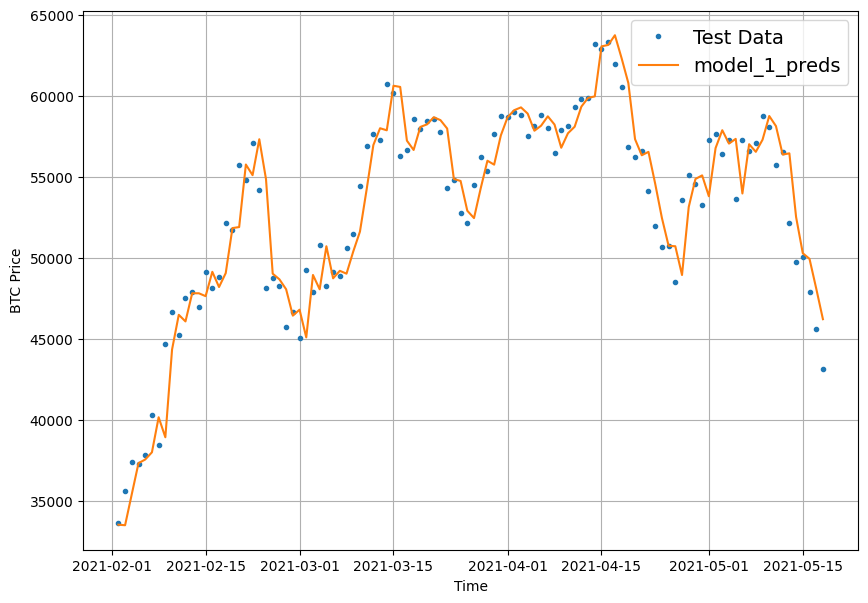

In [42]:
# Plotting model 1 predictions
offset = 450
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="model_1_preds")

## Model 2: Dense (window = 30, horizon = 1)

In [43]:
HORIZON = 1 # predict the next day's price
WINDOW_SIZE = 30 # using previous month's data

In [44]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [45]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [46]:
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)# to hide the warnings

tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_2_dense")

# Compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [47]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 660.3331


660.3330688476562

In [48]:
# Load in the best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 620.3580


620.3580322265625

In [49]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


In [50]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 620.35803,
 'mse': 1323719.8,
 'rmse': 1150.5302,
 'mape': 2.7486327,
 'mase': 1.084392}

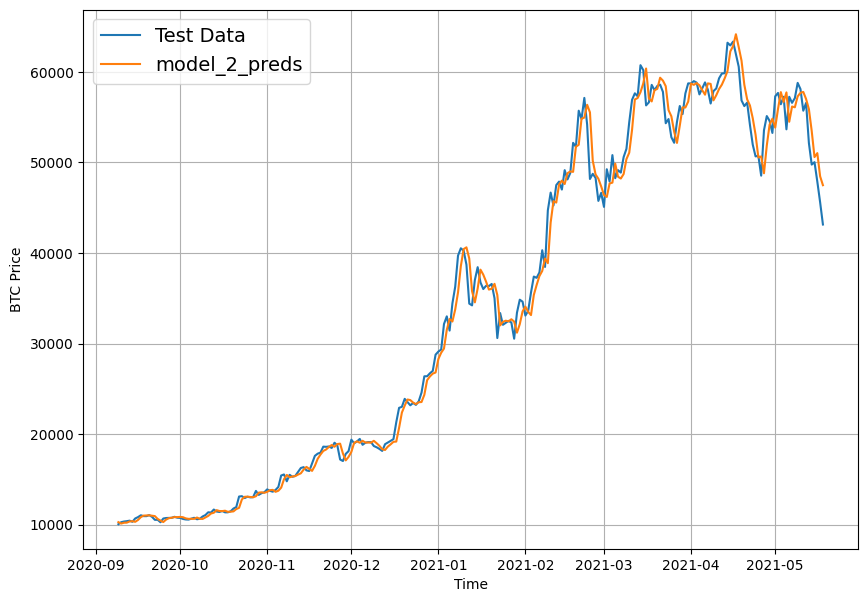

In [51]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

## Model 3: Dense (window = 30, horizon = 7)



In [52]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [53]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [54]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

# Compile
model_3.compile(loss="MAE",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [55]:
# Evaluate the model on the test data
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1371.4274


1371.4273681640625

In [56]:
# Load best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1229.6561


1229.6561279296875

In [57]:
# Make predictions with model_3
model_3_preds = make_preds(model_3,
                           input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


In [58]:
# Evaluate model_3 results (these are going multi-dimensional because we're trying to predict more than one timestep at a time, horizon=7)
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([  582.9017  ,   337.4774  ,   311.0897  ,   489.63184 ,
          376.10504 ,   428.1072  ,   545.2715  ,   526.5555  ,
          449.6739  ,   587.9057  ,   726.4356  ,   671.61383 ,
          784.54877 ,   867.693   ,   575.5277  ,   239.49149 ,
          229.04199 ,   320.46457 ,   295.5821  ,   298.67767 ,
          119.99958 ,   147.65039 ,   390.6071  ,   325.11746 ,
          172.83797 ,   154.59738 ,   122.231865,   181.53955 ,
          146.66881 ,   168.50648 ,   232.2867  ,   342.327   ,
          342.42557 ,   293.0842  ,   248.3734  ,   285.77664 ,
          340.52295 ,   204.72816 ,   235.82053 ,   254.21861 ,
          526.07275 ,   147.1783  ,    85.05413 ,   110.91016 ,
           82.56327 ,   109.74163 ,    48.836357,   136.14474 ,
           95.569824,    81.486885,    80.60456 ,   117.39795 ,
          139.75774 ,   109.96163 ,   269.49924 ,   386.62506 ,
          557.68884 ,   509.81543 ,   567.58734 ,   611.0475  ,
          346.76562 ,   255.747  

## Modifying evaluation function to work for larger horizons

In [59]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, to reduce metrics to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [60]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1229.6561,
 'mse': 5310388.0,
 'rmse': 1420.1884,
 'mape': 5.5020685,
 'mase': 2.1881044}

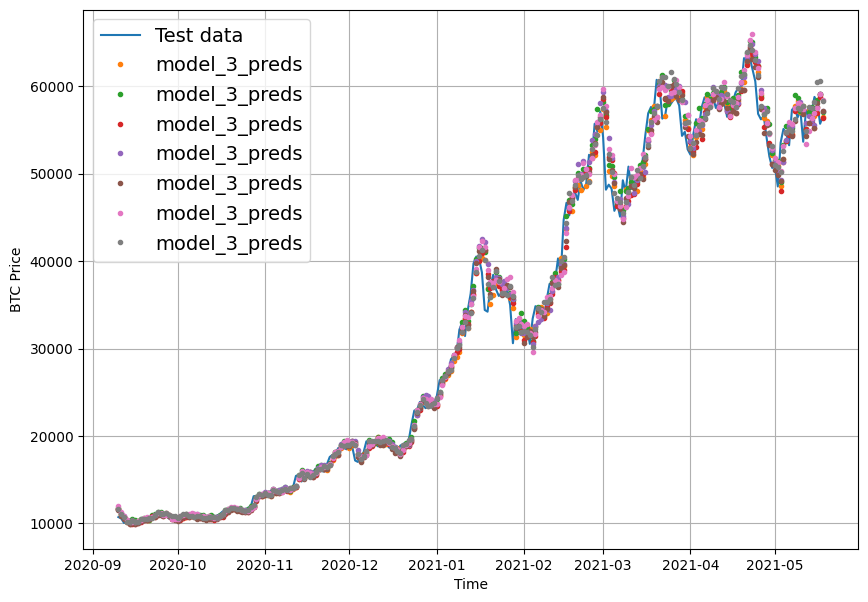

In [61]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

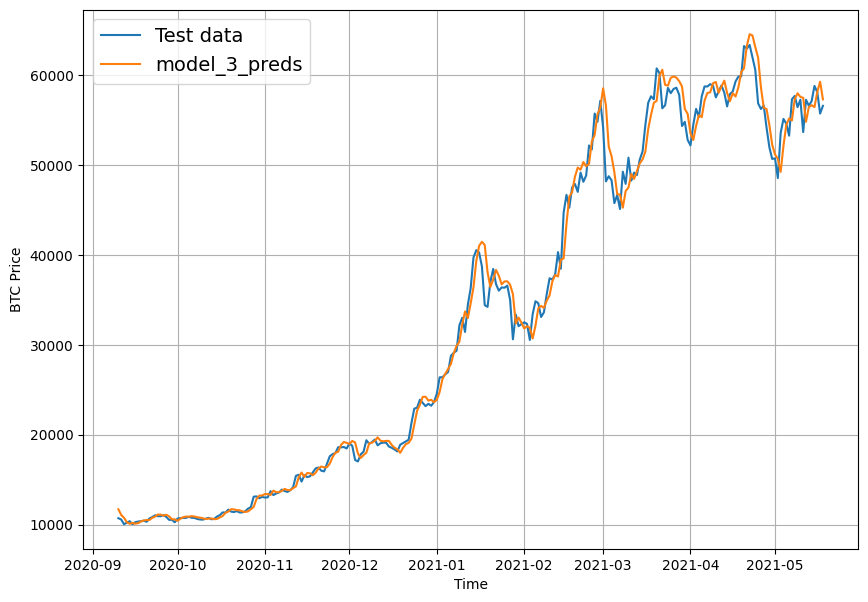

In [62]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 format="-",
                 label="Test data")
# condensing the output of model_3(horizon=7) using tf.reduce_mean to get a singular value for better visualization
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 start=offset,
                 format="-",
                 label="model_3_preds")

## Comparing all models

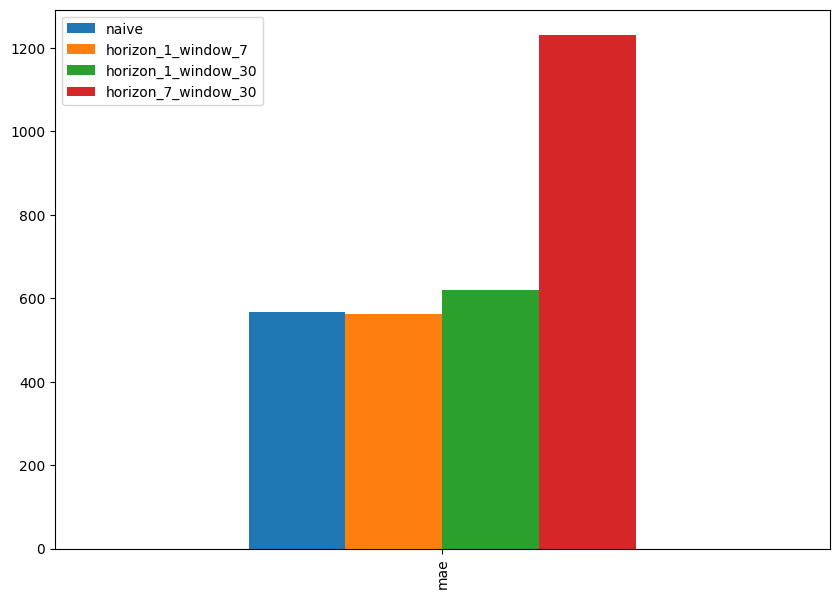

In [63]:
import pandas as pd
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

naive model's results is better than all other model's due to **autocorrelation**

## Model 4: Conv1D

In [64]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth data

In [65]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [66]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [67]:
# Check data input shape
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

to use Conv1D, input shape must be(batch_size, timesteps, input_dim),
but the data currently is of the shape (7,), therefore it should be reshaped

In [68]:
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [69]:
# reshaping by using lambda layer(to add an extra dimension)
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x,axis=1))# add an extra dimension for `input_dim`

In [70]:
# Testing out lambda layer
print(f"Original shape: {x.shape}") # (WINDIW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # output = ...?
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [71]:
tf.random.set_seed(42)

# Create Conv1D model
model_4 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
18/18 [==============================] - 9s 111ms/step - loss: 2076.4795 - val_loss: 5079.4834
Epoch 2/100
18/18 [==============================] - 2s 134ms/step - loss: 337.8721 - val_loss: 1123.9252
Epoch 3/100
18/18 [==============================] - 1s 84ms/step - loss: 191.2135 - val_loss: 990.5235
Epoch 4/100
18/18 [==============================] - 2s 92ms/step - loss: 179.1332 - val_loss: 972.9962
Epoch 5/100
18/18 [==============================] - 3s 148ms/step - loss: 173.5306 - val_loss: 965.1848
Epoch 6/100
18/18 [==============================] - 2s 105ms/step - loss: 174.1899 - val_loss: 964.3375
Epoch 7/100
18/18 [==============================] - 1s 83ms/step - loss: 172.6544 - val_loss: 943.6358
Epoch 8/100
18/18 [==============================] - 2s 92ms/step - loss: 166.8772 - val_loss: 935.0867
Epoch 9/100
18/18 [==============================] - 0s 20ms/step - loss: 165.2642 - val_loss: 948.8937
Epoch 10/100
18/18 [==============================] - 2s 

In [72]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Evaluate model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 6ms/step - loss: 577.3194


577.3193969726562

In [74]:
# Load back in best performing Conv1D and re-evaluate
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 1s 12ms/step - loss: 571.3706


571.37060546875

In [75]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)

18/18 [==============================] - 1s 5ms/step


In [76]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 571.37054,
 'mse': 1186067.5,
 'rmse': 1089.0673,
 'mape': 2.5683901,
 'mase': 1.0037398}

## Model 5: RNN (LSTM)
using data created previously

In [77]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(128, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM")

# Compile
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 10s 352ms/step - loss: 2474.8083 - val_loss: 10660.4834
Epoch 2/100
18/18 [==============================] - 8s 459ms/step - loss: 876.7309 - val_loss: 1105.7393
Epoch 3/100
18/18 [==============================] - 0s 24ms/step - loss: 239.1904 - val_loss: 1318.0531
Epoch 4/100
18/18 [==============================] - 4s 206ms/step - loss: 189.7115 - val_loss: 1004.3630
Epoch 5/100
18/18 [==============================] - 0s 11ms/step - loss: 179.2671 - val_loss: 1004.4496
Epoch 6/100
18/18 [==============================] - 4s 233ms/step - loss: 178.7469 - val_loss: 988.3253
Epoch 7/100
18/18 [==============================] - 0s 13ms/step - loss: 179.8154 - val_loss: 992.3741
Epoch 8/100
18/18 [==============================] - 0s 13ms/step - loss: 175.2181 - val_loss: 995.2555
Epoch 9/100
18/18 [==============================] - 3s 183ms/step - loss: 172.7812 - val_loss: 981.4470
Epoch 10/100
18/18 [==============================]

In [78]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 586.5010


586.5009765625

In [79]:
# Make prediction with the LSTM model
model_5_preds = make_preds(model_5, test_windows)

18/18 [==============================] - 0s 3ms/step


In [80]:
# Evaluate model 5 predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 586.501,
 'mse': 1241205.4,
 'rmse': 1114.094,
 'mape': 2.6384852,
 'mase': 1.0303198}

## Make a multivariate time series dataset
adding an extra feature bitcoin halving to the dataset
>Bitcoin halving is an event where the block reward for mining new bitcoin is halved, meaning that bitcoin miners will receive 50% less bitcoin for every transaction they verify. When this occured in the past **price fluctuations** usually follow.

In [81]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [82]:
# adding the bitcoin halving events to the dataset
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [83]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

* everything untill 1012 index will have block reward 2
*everything between 1012 & 2421 will ave block reward 3
*everything between from 2421 will have block reward 4

In [84]:
# Add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block_reward values as a feature to the dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2# every row untill index 1021, set the -1(block_reward_coloumn) as block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [85]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [86]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


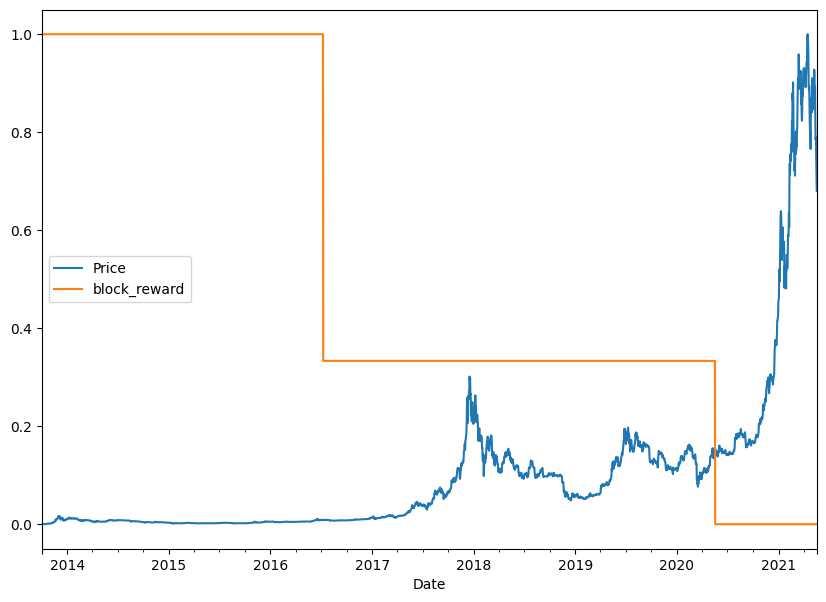

In [87]:
# Plot the block reward vs price over time
# using minmax to bring price and bloc_reward to the same scale
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                                                       columns=bitcoin_prices_block.columns,
                                                                       index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

## Making a windowed dataset with pandas
using pandas.DataFrame.shift(), since the current data is multivariate

In [88]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [89]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


windowed the daaset using shift method

```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
```



In [90]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [91]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [92]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: Dense (multivariate time series)

In [93]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
18/18 [==============================] - 5s 106ms/step - loss: 914.8148 - val_loss: 2502.3191
Epoch 2/100
18/18 [==============================] - 1s 68ms/step - loss: 232.1940 - val_loss: 1016.6089
Epoch 3/100
18/18 [==============================] - 2s 116ms/step - loss: 158.7543 - val_loss: 816.3029
Epoch 4/100
18/18 [==============================] - 0s 24ms/step - loss: 144.6093 - val_loss: 853.9489
Epoch 5/100
18/18 [==============================] - 1s 86ms/step - loss: 143.1373 - val_loss: 782.5698
Epoch 6/100
18/18 [==============================] - 0s 8ms/step - loss: 145.6952 - val_loss: 827.1985
Epoch 7/100
18/18 [==============================] - 1s 62ms/step - loss: 143.3194 - val_loss: 771.4808
Epoch 8/100
18/18 [==============================] - 1s 68ms/step - loss: 140.1181 - val_loss: 768.5954
Epoch 9/100
18/18 [==============================] - 0s 15ms/step - loss: 140.6246 - val_loss: 784.2283
Epoch 10/100
18/18 [==============================] - 1s 66ms

In [94]:
# Evaluate multivariate model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 713.5671


713.567138671875

In [95]:
# Load in and evaluate best performing model
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 568.0372


568.0371704101562

In [96]:
# Make predictions with multivariate model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8879.662, 8780.415, 9016.058, 8811.02 , 8730.363, 8709.689,
       8714.183, 8531.145, 8449.125, 8531.376], dtype=float32)>

In [97]:
# Evaluate predictions to get eval metrics
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 568.03723,
 'mse': 1169785.4,
 'rmse': 1081.5662,
 'mape': 2.5576518,
 'mase': 0.9978841}

In [98]:
model_1_results

{'mae': 562.87085,
 'mse': 1150605.9,
 'rmse': 1072.663,
 'mape': 2.5162096,
 'mase': 0.98880816}

## Model 7: N-BEATS algorithm
TensorFlow doesn't have an N-BEATS block layer, so creating a custom layer using subclassing.

In [99]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  # call method describes what the layer is going to do from inputs to outputs
  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [100]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [101]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [102]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.45064113 -0.03058177  0.46984798  0.10501297  0.21770835  0.44029832
  0.03949833]
Forecast: -0.05825507640838623


### Preparing data for the N-BEATS algorithm using `tf.data`
for faster data loading


In [103]:
HORIZON = 1
WINDOW_SIZE = 7

In [104]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [105]:
# Add windowed columns using shift method
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [106]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [109]:
# Making the dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm

In [110]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections
There are two layers for the residual conections(substract and add)
>
The N-BEATS algorithm uses double residual stacking to help train its deeper architecture

In [111]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, compiling and fitting the N-BEATS algorithm

In [112]:
%%time

tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass in the residuals

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_NBEATS")

# 8. Compile model with MAE loss
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)])


Epoch 437: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 944: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1044: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 5min 5s, sys: 6.4 s, total: 5min 12s
Wall time: 6min 3s


In [113]:
# Evaluate N-BEats model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 33ms/step - loss: 574.5433


574.5433349609375

In [114]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:5]

1/1 [==============================] - 2s 2s/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([8821.916 , 8766.278 , 9025.7705, 8753.213 , 8750.039 ],
      dtype=float32)>

In [115]:
# Evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 574.54333,
 'mse': 1165611.0,
 'rmse': 1079.6346,
 'mape': 2.599481,
 'mase': 1.0093135}

### Plotting the N-BEATS architecture

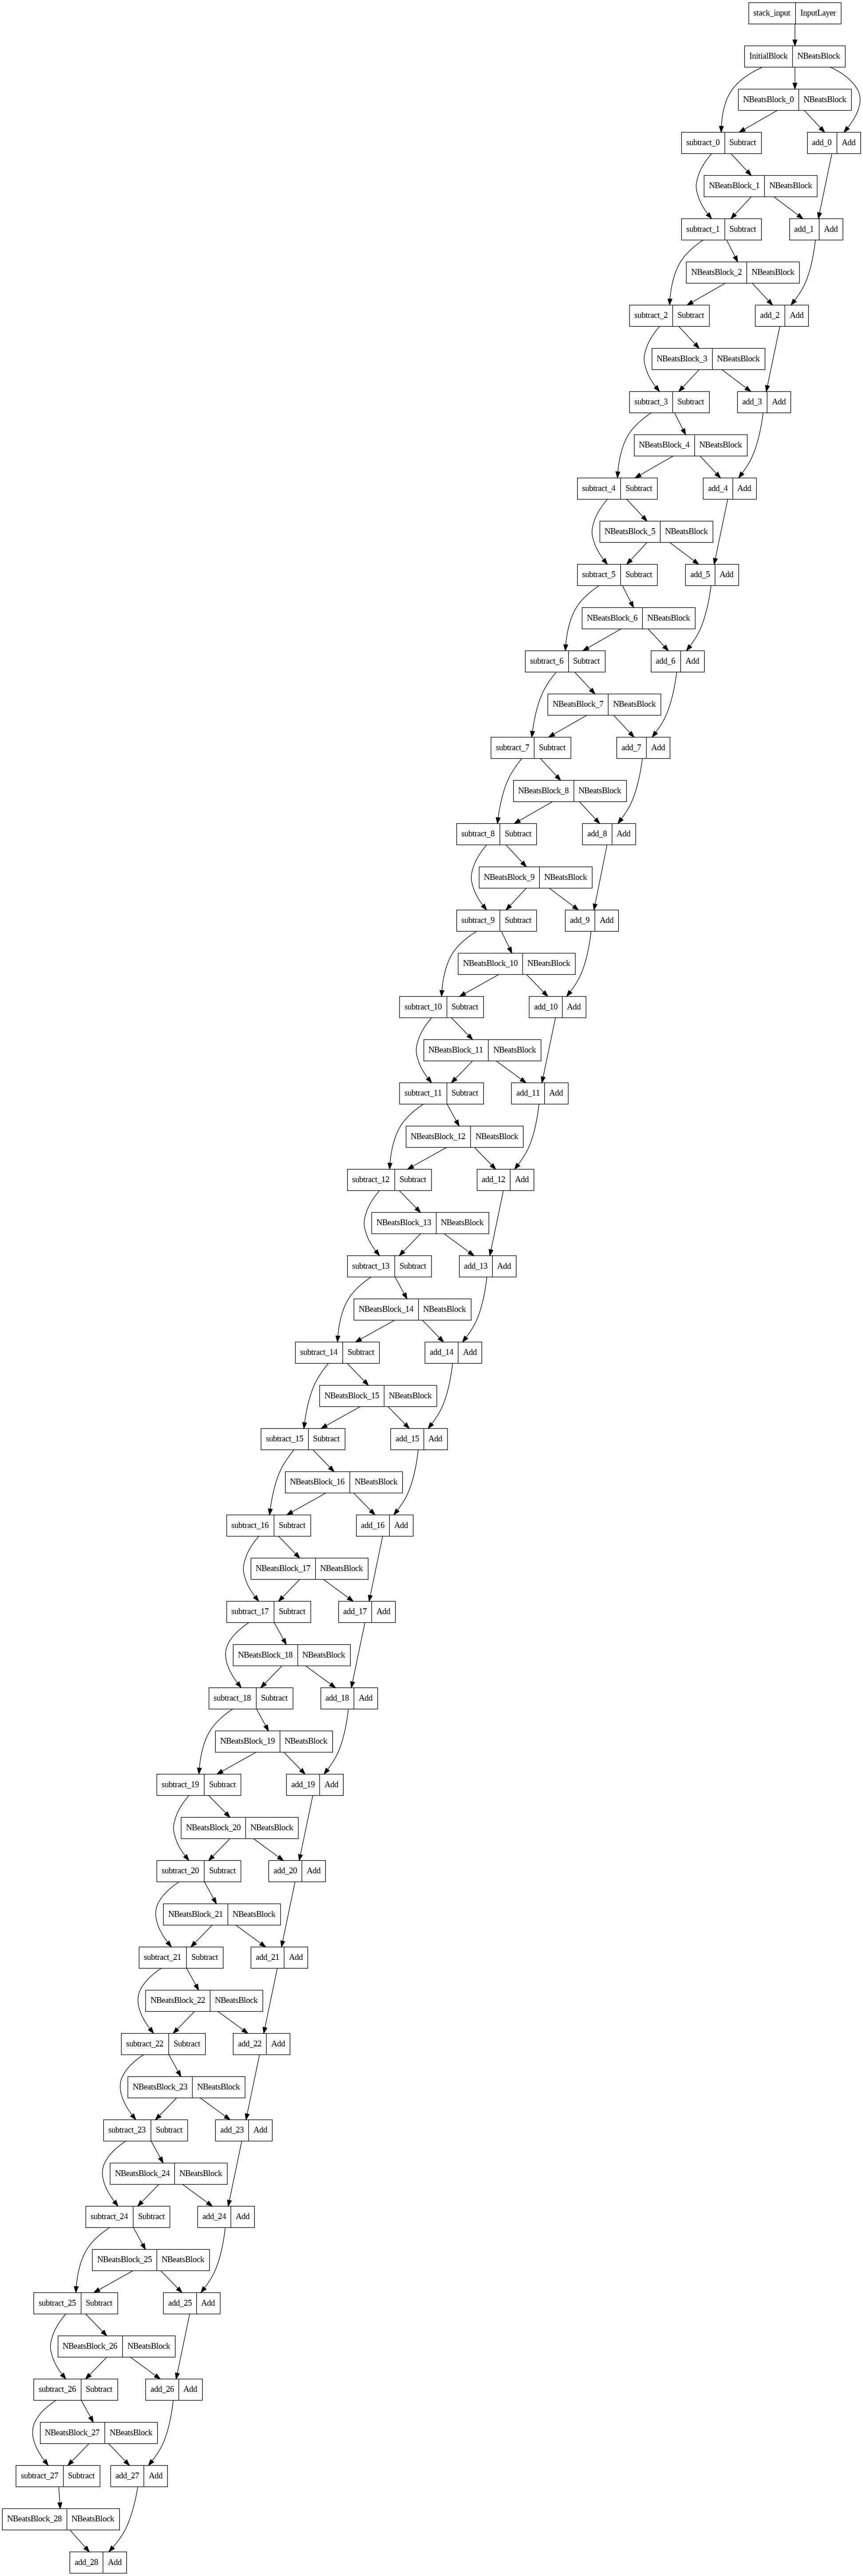

In [117]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an ensemble (stacking different models together)

Combines the decision making abilities of different models together to predict a common goal.

### Constructing and fitting and ensemble of models (using different loss functions)

In [118]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize dense layers with normal distribution for estimating prediction intervals later on
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit the current model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models

In [119]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 915: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 255: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 355: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 198: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 645: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 745: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 681: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 956: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 624: ReduceLROnPl

### Make predictions with our ensemble model

In [124]:
ensemble_models

In [125]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [126]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 143ms/step


1/1 [==============================] - 0s 140ms/step


1/1 [==============================] - 0s 45ms/step
CPU times: user 1.31 s, sys: 70 ms, total: 1.38 s
Wall time: 41.3 s


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8760.983,  8803.052,  9102.021, ..., 49598.67 , 48866.24 ,
        46311.746],
       [ 8731.614,  8744.407,  9091.335, ..., 49533.375, 48620.15 ,
        45546.68 ],
       [ 8817.593,  8775.954,  9086.643, ..., 49572.035, 47940.297,
        45432.47 ],
       ...,
       [ 8795.231,  8812.301,  9113.247, ..., 50261.297, 48370.918,
        46574.566],
       [ 8753.293,  8798.608,  9138.678, ..., 50028.43 , 47326.953,
        45309.965],
       [ 8815.241,  8777.456,  9085.853, ..., 49753.65 , 48152.8  ,
        45475.594]], dtype=float32)>

In [127]:
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8760.983,  8803.052,  9102.021, ..., 49598.67 , 48866.24 ,
        46311.746],
       [ 8731.614,  8744.407,  9091.335, ..., 49533.375, 48620.15 ,
        45546.68 ],
       [ 8817.593,  8775.954,  9086.643, ..., 49572.035, 47940.297,
        45432.47 ],
       ...,
       [ 8795.231,  8812.301,  9113.247, ..., 50261.297, 48370.918,
        46574.566],
       [ 8753.293,  8798.608,  9138.678, ..., 50028.43 , 47326.953,
        45309.965],
       [ 8815.241,  8777.456,  9085.853, ..., 49753.65 , 48152.8  ,
        45475.594]], dtype=float32)>

Ensemble models preds came out in multiple dimensions, so using mean and median to combine the preds into a single prediction

In [128]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8775.24 , 8783.192, 9069.431, 8693.683, 8743.967, 8713.746,
       8650.994, 8480.677, 8451.368, 8522.618], dtype=float32)>

In [129]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([8782.395, 8788.421, 9074.241, 8693.529, 8748.995, 8711.591,
       8655.755, 8495.587, 8460.967, 8528.671], dtype=float32)

In [130]:
# Evaluate ensemble model predictions using mean
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

{'mae': 570.7095,
 'mse': 1149623.4,
 'rmse': 1072.2048,
 'mape': 2.5832849,
 'mase': 1.0025785}

In [131]:
# Evaluate ensemble model predictions using median
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_results

{'mae': 569.36725,
 'mse': 1146656.4,
 'rmse': 1070.8204,
 'mape': 2.577407,
 'mase': 1.0002205}

### Plotting the prediction intervals (uncertainty estimates) of the ensemble
Till now, the predictions were point predictions, i.e.,pedicting a single value. We can calculate the prediction intreval(lower bound - upperbound) which will consists of a range of values and the point prediction will be in between these values.

One way to get the 95% confidence prediction intervals for a deep learning model is the bootstrap method:
1. Take the predictions from a number of randomly initialzed models (ensemble models)
2. Measure the standard deviation of the predictions
3. Multiply the standard deviation by 1.96 (assuming the distribution is Gaussian/Normal, 95% of observations fall within 1.96 standard deviations of the mean)
4. To the get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)

In [132]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions from a number of randomly intialized models

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96, assuming that 95% of the data lies in between -1.96 and +1.96
  interval = 1.96 * std

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [133]:
# Get the upper and lower bounds of the 95% percent prediction interval
lower, upper = get_upper_lower(preds=ensemble_preds)

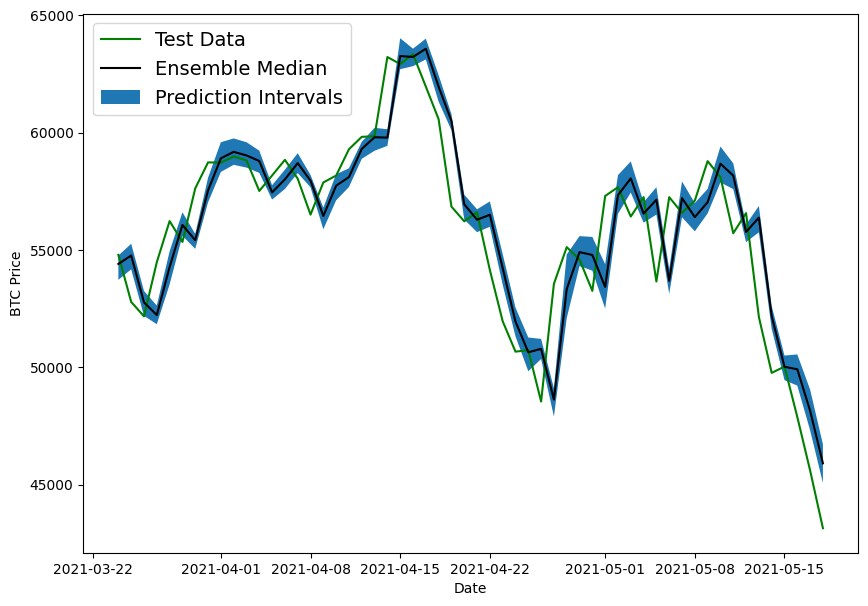

In [134]:
# Get the median/mean values of the ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of the ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
# To plot the upper and lower bounds using fill_between
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

## Model 9: Train a model on the full historical data to make predictions into the future

In [135]:
HORIZON = 1
WINDOW_SIZE = 7

In [136]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [137]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
# Get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(2780, 2780)

In [138]:
# Turn data into efficient running tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimial performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [139]:
tf.random.set_seed(42)

# Create model
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_9_future_model")

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

### Make predictions into future

1. Takes as input:
 * a list of values (Bitcoin historical data)
 * a trained model
 * a window into the future to predict (`INTO_FUTURE` variable)
 * the window size a model was trained on (`WINDOW_SIZE`) - the model can only predict on the same kind of data it was trained on
2. Creates an empty list for future forecasts (this will be returned at the end of the end, when it's full of predictions) and extracts the last `WINDOW_SIZE` values from the input values
3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the latest prediction

In [140]:
# How many timestesp to predict into the future?
INTO_FUTURE = 14

In [141]:
# 1. Create function to make predictions into the future
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Make future forecasts into_future steps after values ends.

  Returns future forecasts as a list of floats.
  """
  # 2. Create an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # 3. Make INTO_FUTURE numer of predictions, altering the data which gets predicted on each
  for _ in range(INTO_FUTURE):
    # Predict on the last window then append it again, again, again (model will eventually start to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [142]:
# Make forecasts into the future
future_forecast = make_future_forecasts(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 104ms/step
Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 56024.47265625

1/1 [==============================] - 0s 43ms/step
Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 56024.47265625] -> Prediction: 51538.86328125

1/1 [==============================] - 0s 35ms/step
Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 56024.47265625 51538.86328125] -> Prediction: 48289.69140625

1/1 [==============================] - 0s 36ms/step
Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 56024.47265625 51538.86328125 48289.69140625] -> Prediction: 48229.0078125

1/1 [==============================] - 0s 62ms/step
Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 56024.47265625
 51538.86328125 48289.69140625 48229.007812

### Plot future forecasts

In [144]:
future_forecast

[56024.473,
 51538.863,
 48289.69,
 48229.008,
 49228.684,
 46581.535,
 47382.434,
 54866.855,
 50917.46,
 47215.72,
 48262.797,
 50424.934,
 48078.926,
 49259.402]

The current dataset doesn't have the dates in which the model predicted on, so we'll have to add that dates to the dataset to plot.

In [143]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values ranging from start_date to start_date+into_future
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start and end date

In [145]:
# Last timestep of timesteps (currently np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [146]:
# Get next two week of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [147]:
# Insert last timestep/final price into next time steps and future forecasts to make the plot look better
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 56024.473, 51538.863, 48289.69 , 48229.008, 49228.684,
        46581.535, 47382.434, 54866.855, 50917.46 , 47215.72 , 48262.797,
        50424.934, 48078.926, 49259.402], dtype=float32))

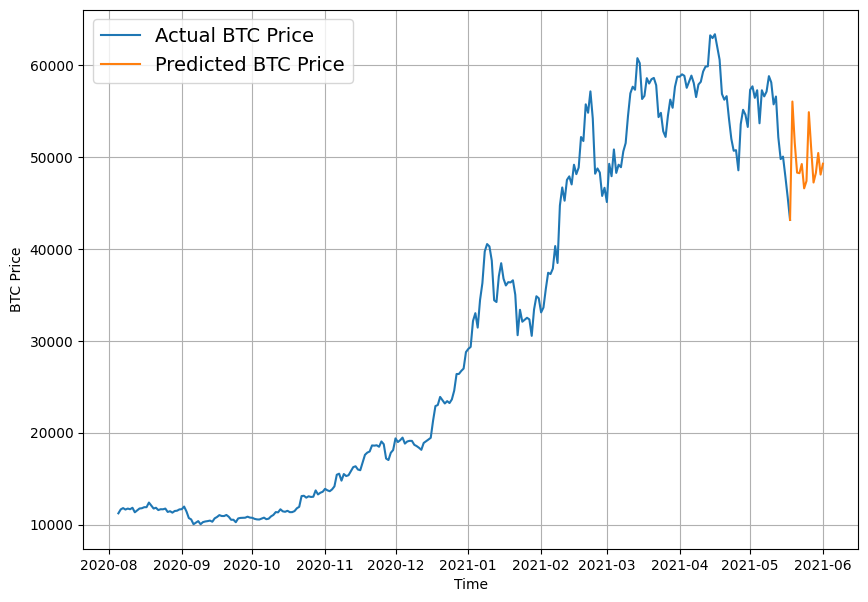

In [148]:
# Plot future prices predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

## Compare models

In [152]:
# Compare different model results (w = window, h = horizon)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_7_NBEATS": model_7_results,
                              "model_8_ensemble": ensemble_results}).T
model_results

,mae,mse,rmse,mape,mase
naive_model,567.980225,1147547.000,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,562.870850,1150605.875,1072.662964,2.516210,0.988808
model_2_dense_w30_h1,620.358032,1323719.750,1150.530151,2.748633,1.084392
model_3_dense_w30_h7,1229.656128,5310388.000,1420.188354,5.502069,2.188104
model_4_CONV1D,571.370544,1186067.500,1089.067261,2.568390,1.003740
model_5_LSTM,586.500977,1241205.375,1114.093994,2.638485,1.030320
model_6_multivariate,568.037231,1169785.375,1081.566162,2.557652,0.997884
model_7_NBEATS,574.543335,1165611.000,1079.634644,2.599481,1.009313
model_8_ensemble,569.367249,1146656.375,1070.820435,2.577407,1.000221


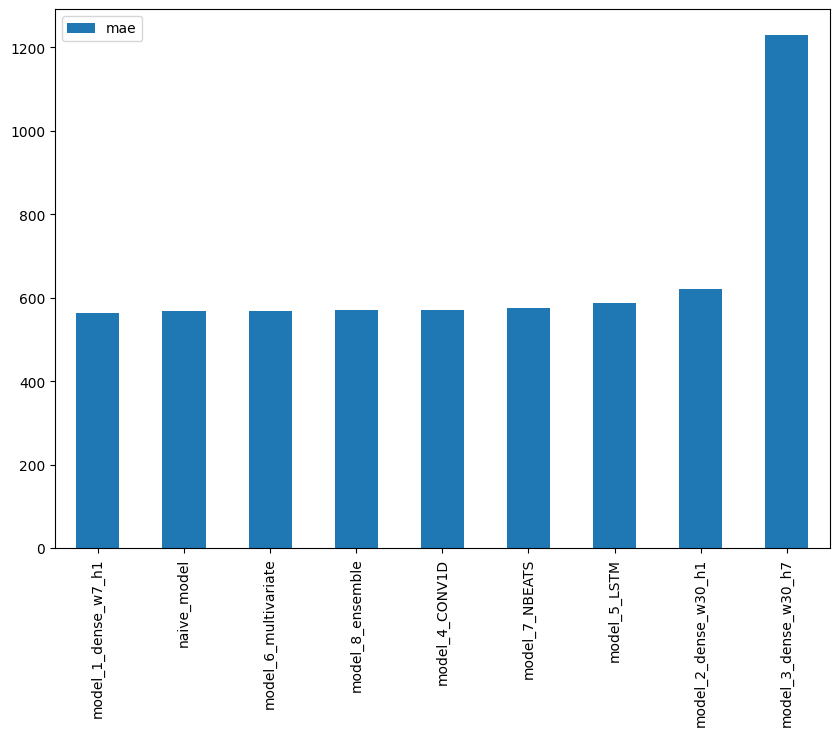

In [153]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");